In [3]:
import pandas as pd

# Correct file paths (use raw string or double backslashes)
mat_path = r"D:\ML PROJECTS\Graduate Admission Prediction using Machine Learning\Admission_Predict_Ver1.1.csv"
por_path = r"D:\ML PROJECTS\Graduate Admission Prediction using Machine Learning\Admission_Predict.csv"

# Load both datasets (they use commas, not semicolons)
mat_df = pd.read_csv(mat_path)
por_df = pd.read_csv(por_path)

# Standardize column names (strip whitespaces and unify format)
mat_df.columns = [col.strip() for col in mat_df.columns]
por_df.columns = [col.strip() for col in por_df.columns]

# Merge the datasets by stacking them
merged_df = pd.concat([mat_df, por_df], ignore_index=True)

# Show shape and a quick preview
print("Merged DataFrame Shape:", merged_df.shape)
print(merged_df.head())


Merged DataFrame Shape: (900, 9)
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  


In [5]:
# Save the merged dataset to a CSV file (without the index column)
merged_df.to_csv("D:/ML PROJECTS/Graduate Admission Prediction using Machine Learning/merged_admission_data.csv", index=False)

print("✅ Merged dataset saved successfully.")


✅ Merged dataset saved successfully.


In [2]:
# Step 1: Load and clean the merged dataset
import pandas as pd

# Load the merged dataset (assuming it's the one already combined and cleaned)
file_path = "D:\ML PROJECTS\Graduate Admission Prediction using Machine Learning\merged_admission_data.csv"
df = pd.read_csv(file_path)

# Drop the 'Serial No.' column as it's not useful for prediction
df.drop(columns=['Serial No.'], inplace=True)

# Display basic info
df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          900 non-null    int64  
 1   TOEFL Score        900 non-null    int64  
 2   University Rating  900 non-null    int64  
 3   SOP                900 non-null    float64
 4   LOR                900 non-null    float64
 5   CGPA               900 non-null    float64
 6   Research           900 non-null    int64  
 7   Chance of Admit    900 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 56.4 KB


(None,
         GRE Score  TOEFL Score  University Rating         SOP        LOR  \
 count  900.000000   900.000000         900.000000  900.000000  900.00000   
 mean   316.621111   107.288889           3.102222    3.385556    3.47000   
 std     11.369700     6.073968           1.143048    0.997612    0.91319   
 min    290.000000    92.000000           1.000000    1.000000    1.00000   
 25%    308.000000   103.000000           2.000000    2.500000    3.00000   
 50%    317.000000   107.000000           3.000000    3.500000    3.50000   
 75%    325.000000   112.000000           4.000000    4.000000    4.00000   
 max    340.000000   120.000000           5.000000    5.000000    5.00000   
 
              CGPA    Research  Chance of Admit  
 count  900.000000  900.000000       900.000000  
 mean     8.586433    0.554444         0.722900  
 std      0.600822    0.497303         0.141722  
 min      6.800000    0.000000         0.340000  
 25%      8.140000    0.000000         0.640000 

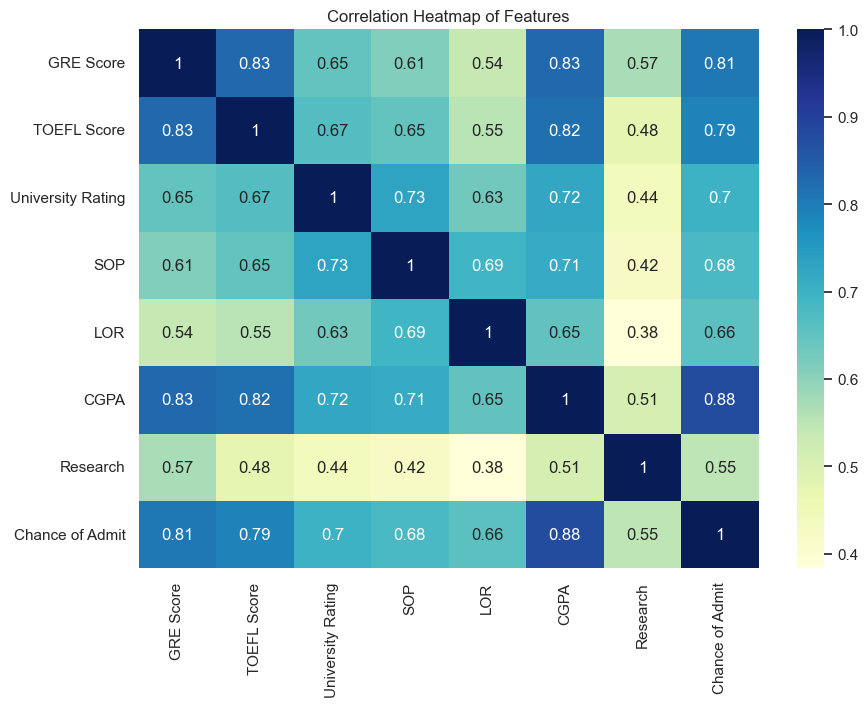

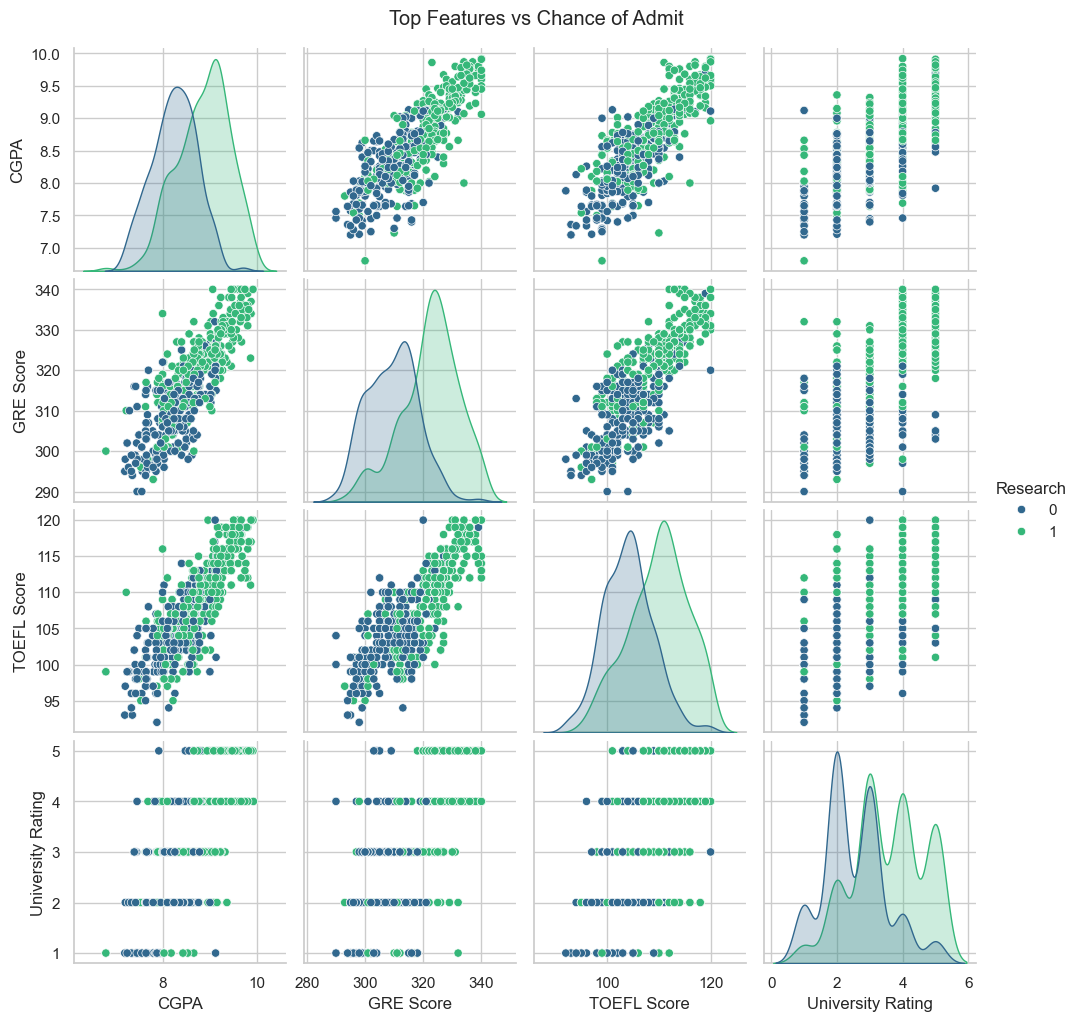

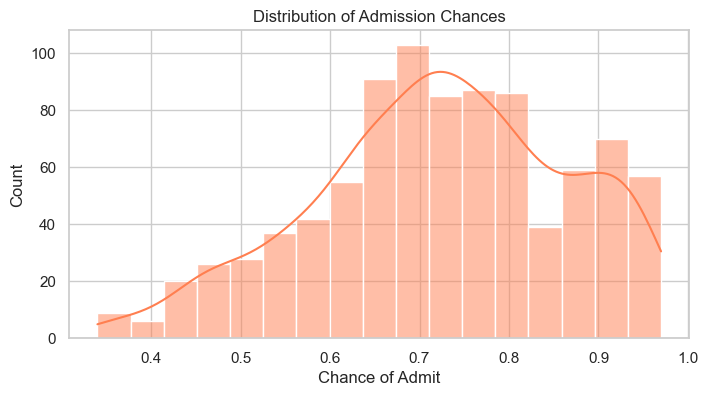

C:\Users\yuvan\AppData\Local\Temp\ipykernel_17936\2725128105.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Research", y="Chance of Admit", data=df, palette="Set2")


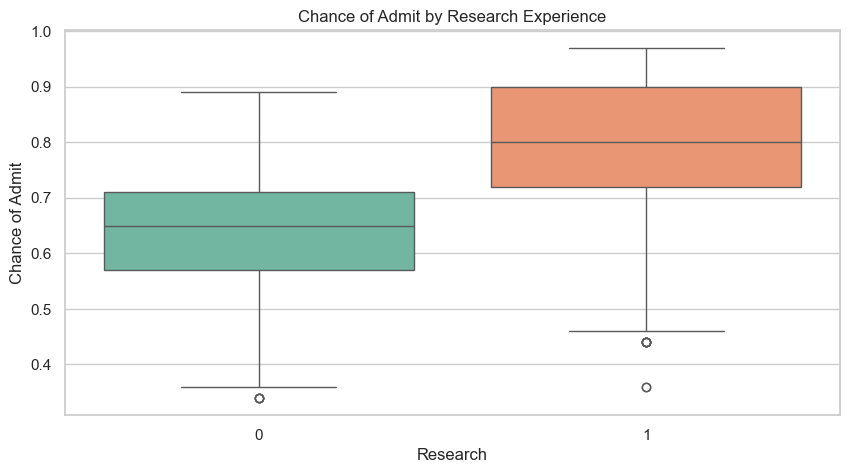

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Heatmap of correlation
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Features")
plt.show()

# Pairplot of top correlated features
top_corr = df.corr()["Chance of Admit"].abs().sort_values(ascending=False)[1:5].index
sns.pairplot(df, vars=top_corr, hue="Research", palette="viridis")
plt.suptitle("Top Features vs Chance of Admit", y=1.02)
plt.show()

# Distribution of Chance of Admit
plt.figure(figsize=(8, 4))
sns.histplot(df["Chance of Admit"], kde=True, color="coral")
plt.title("Distribution of Admission Chances")
plt.show()

# Boxplots by Research Experience
plt.figure(figsize=(10, 5))
sns.boxplot(x="Research", y="Chance of Admit", data=df, palette="Set2")
plt.title("Chance of Admit by Research Experience")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target
X = df.drop("Chance of Admit", axis=1)
y = df["Chance of Admit"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and y_pred are already defined from the model's prediction
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Fix for older sklearn
r2 = r2_score(y_test, y_pred)

print(f"✅ MAE  : {mae:.2f}")
print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ R² Score : {r2:.2f}")


✅ MAE  : 0.03
✅ RMSE : 0.04
✅ R² Score : 0.90


In [6]:
import joblib

# Save model
joblib.dump(model, "D:/ML PROJECTS/Graduate Admission Prediction using Machine Learning/admit_predictor_model.pkl")

# Save feature scaler (if used later)
# joblib.dump(scaler, "D:/.../scaler.pkl")


['D:/ML PROJECTS/Graduate Admission Prediction using Machine Learning/admit_predictor_model.pkl']